# Step6 演習01 SVMとその利用
---

Step6ではscikit-learnを用いてSVMの実装を行います。

scikit-learnのSVMは台湾大学が開発しているLIBSVMのラッパーとして実装されています。

LIBSVMはとても著名なライブラリーです。

Python以外の言語でSVMを用いるときも必ずと言ってよいほどお世話になるでしょう。

また、カーネル法を用いない素のSVMのことを線形SVMと呼ぶのでした。ほぼ線形分離可能であるように見えるサンプルデータを作成し、それを用いて学習させてみます。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- 線形SVMの実装を行う。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [numpy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント
- [scikit-learnチュートリアル sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [LIBSVM](http://www.csie.ntu.edu.tw/~cjlin/libsvm/) 

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番に**順次実行してください。

** 注意： **初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
import os
font = {'family':'IPAexGothic'}
plt.rc('font', **font)

### SVMに使うサンプルデータを生成
実装したロジスティック回帰のコードを試すためのサンプルデータを最初に生成しておきます。一度生成したら同じものを毎回使えるように、データをCSVファイル(Comma-Separated Values コンマで区切られたデータ)で保存しておきます。新たなデータを使いたいときは、CSVファイルの名前を変えるか、コードを変えましょう。

In [2]:
if os.path.isfile("./dataStep6/dataStep6_1.csv") == True:
    data = np.loadtxt("./dataStep6/dataStep6_1.csv", delimiter = ",")
    X = data[:,0:2]  # X.shapeは(100, 2)
    y = data[:,2] #y.shapeは(100, ) 1-dimのndarrayにしておく（縦ベクトルにならないこと注意）

else:
    X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
    X = X * 12.5 + 50 # -4から4くらいから0から100くらいに変える
    np.savetxt("./dataStep6/dataStep6_1.csv", np.c_[X, y], delimiter=",", fmt="%f,%f,%d")

上のセルを実行したことによりデータセットを "data" に格納しました。下のセルを実行して、dataのshapeを確認しましょう。

In [3]:
data.shape

(100, 3)

(100,3)と表示されたはずです。
<br>
<br>
このデータセットは、100行3列の行列が格納されています。Xにdataの2列目までのデータセットを格納し、yにdataの3列目のデータを格納しています。下のセルを実行して、格納したdataの中身の一部分を確認してみましょう。

In [4]:
data[:5]

array([[51.859654, 34.912101,  0.      ],
       [44.591172, 67.846404,  1.      ],
       [40.655864, 36.493024,  0.      ],
       [49.223834, 58.59186 ,  1.      ],
       [27.780766, 42.901923,  0.      ]])

In [5]:
data[:5,0][:,np.newaxis]

array([[51.859654],
       [44.591172],
       [40.655864],
       [49.223834],
       [27.780766]])

In [6]:
data[:5,1][:,np.newaxis]

array([[34.912101],
       [67.846404],
       [36.493024],
       [58.59186 ],
       [42.901923]])

In [7]:
data[:5,2][:,np.newaxis]

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.]])

dataの中身を訓練データ X と目標変数 y にわけました。** X **と ** y ** のデータを改めてshapeで確認しておきましょう。

In [8]:
X.shape

(100, 2)

In [9]:
y.shape

(100,)

## データセットの視覚化

### 生成したデータの表示

視覚化は機械学習の実装において大変重要な作業になります。開発を進める前にデータセットの性質を把握し、視覚化する癖をつけておきましょう。

**【課題１】** 生成したデータをプロットする関数`plotData(X, y)`を書きましょう。y=1のデータは`marker='+'`、y=0のデータは`marker='o'`でプロットしましょう。

In [14]:
#Coursemale-02 Step6 QuestionNumber1 aa31cf959af12a077cd8d41f3e575a7e
def plotData(X, y):
###############ここを穴埋めしてください###############
#回答をそのまま記載しています。コードを参考に自己学習しましょう。
    pos = (y == 1)
    neg = (y == 0)

    plt.hold(True)
    plt.scatter(X[pos,0], X[pos,1], marker='+')
    plt.scatter(X[neg,0], X[neg,1], marker='o')
    
    plt.xlim(X[:,0].min(),X[:,0].max())
    plt.ylim(X[:,1].min(),X[:,1].max())

    plt.draw()
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [15]:
%%bash
./validation_client.py male-02 6 1 Step6_01.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



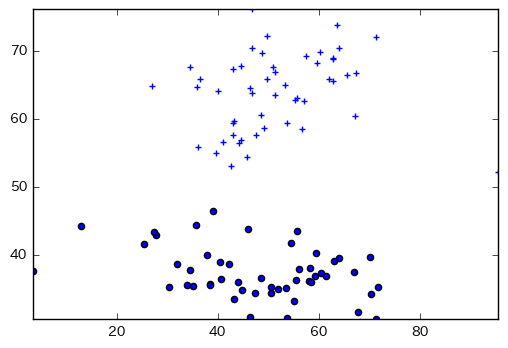

In [16]:
plotData(X, y)

### 線形SVMの学習

正則化パラメータの逆数のようなものである`C`値は、とりあえず1とします。余力があれば、`C`値を変えるとSVMの挙動はどう変わるのか、まず想像した上で、実際に試してみましょう。

In [17]:
C = 1

学習させるためのインスタンスを作成します。

In [18]:
estimator = svm.SVC(C=C, kernel="linear")

そのインスタンスを学習させます。

In [19]:
estimator.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 学習結果のプロット

学習によって得られた決定境界をプロットします。

In [20]:
def visualizeBoundaryLinear(X, y, estimator):
    w = estimator.coef_.flatten()
    b = estimator.intercept_.flatten()

    xp = np.array([min(X[:, 0])-10, max(X[:, 0])+10])
    yp = -(w[0] * xp + b) / w[1]
    
    plotData(X, y)
    plt.plot(xp, yp)
    
    plt.xlim(X[:,0].min(),X[:,0].max())
    plt.ylim(X[:,1].min(),X[:,1].max())
    
    plt.show()

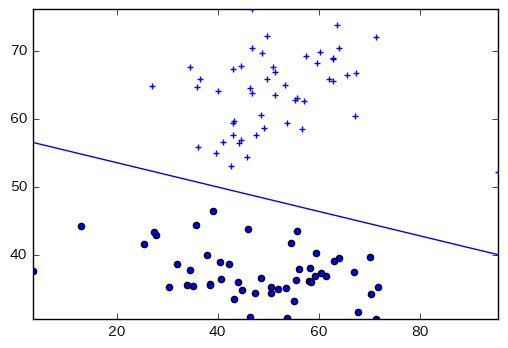

In [21]:
visualizeBoundaryLinear(X, y, estimator)